# Latent Semantic Analysis (LSA)
* generally used for Dimensionality Reduction, or Noise Reducing
* uses Bag of Words (BoW) model - to produce a Term-Document matrix
* learn latent topics using Singular Value Decomposition (SVD) - decomposition of T-D matrix
    * SVD - matrix factorization method, representing a matrix as the product of 2 matrices
    
## Discovering Hidden Topics in Documents
* Topic Modeling - a technique for text mining, by identifying co-occurring keywords
* Unsupervised text analytics algorithm
    * different from Text Classification, a Supervised ML problem with pre-defined classes
    * Topic Modeling involves Discovering these Groups of co-occurring words
        * Topic Modeling can be used to help solve a Text Classification problem
* Topic Coherence Measure - method for determining k (number of topics)

### Topic Models are used for many purposes
* clutering documents
* organizing content for information retrieval/recommendations
* recruiters use them to extract job descriptions and map them to candidates

#### if necessary install gensim & nltk

In [1]:
!pip install gensim

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

## Load Data
* can be located here: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Latent+Semantic+Analysis+in+Python/articles+4.txt

### Create Functions - for Loading Data, Preprocessing Data, Preparing Corpus, Creating Gensim LSA Model, Computing Coherence Values, & for Plotting these Values
* Loading Data
* output should be list of paragraphs/documents and title (initial 100 words)

In [3]:
def load_data(path,file_name):
    documents_list = []
    titles=[]
    
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
            
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    
    return documents_list,titles

* Preprocess Data
    * Tokenize articles
    * Remove stopwords
    * Stemming of article

In [4]:
def preprocess_data(doc_set):
    
    # initialize regex tokenizer
    # create English stopwords list
    # create p_stemmer - PorterStemmer class
    # create empty list for tokenized documents
    
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))    
    p_stemmer = PorterStemmer()
    texts = []
    
    # loop through the document list
    
    for i in doc_set:
        # clean and tokenize document string
        # remove stopwords from tokens
        # stem tokens
        # add tokens to list
        
        raw = i.lower()
        tokens = tokenizer.tokenize(raw) 
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)
    
    return texts

* Prepare Corpus
    * Create Term-Document matrix
    * Create Dictionary of Terms

In [5]:
def prepare_corpus(doc_clean):

    # Create term dictionary of our courpus, every unique term assigned an index
    # use this dictionary - to convert list of documents (corpus) - to Term-Document matrix
    
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    
    return dictionary, doc_term_matrix

* Create Gensim LSA Model
    * following corpus creation - use LSA to generate model

In [6]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    
    # generate & train LSA model
    
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)
    
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    
    return lsamodel

#### Optimize results by identifying the best number of Topics (k)
* Compute Coherence Values
* this function will need several inputs:
    * gensim dictionary
    * doc_term_matrix (gensim corpus)
    * doc_clean (text)
    * stop (max number of Topics)
    * start
    * step

In [7]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, stop, step):
        
        # generate & train LSA model
        
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  
        model_list.append(model)
        
        coherencemodel = CoherenceModel(model=model, texts=doc_clean,
                                        dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

* Finally, create a Function to Plotting Coherence Score values

In [8]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix, 
                                                            doc_clean,
                                                            stop, start, step)
    
    x = range(start, stop, step)
    
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

# Apply Functions
### Load and Assign Data

In [13]:
document_list, titles = load_data("../../Downloads/", "articles+4.txt")

Total Number of Documents: 4551


### Preprocess and Assign Data

In [14]:
clean_text = preprocess_data(document_list)

### Run Model

In [17]:
number_of_topics = 7
words = 10

model = create_gensim_lsa_model(clean_text, number_of_topics, words)

[(0, '0.361*"trump" + 0.272*"say" + 0.233*"said" + 0.166*"would" + 0.160*"clinton" + 0.140*"peopl" + 0.136*"one" + 0.126*"campaign" + 0.123*"year" + 0.110*"time"'), (1, '0.389*"citi" + 0.370*"v" + 0.356*"h" + 0.355*"2016" + 0.354*"2017" + 0.164*"unit" + 0.159*"west" + 0.157*"manchest" + 0.116*"apr" + 0.112*"dec"'), (2, '-0.612*"trump" + -0.264*"clinton" + 0.261*"eu" + 0.148*"say" + 0.137*"would" + -0.135*"donald" + 0.134*"leav" + 0.134*"uk" + -0.119*"republican" + 0.110*"cameron"'), (3, '-0.400*"min" + 0.261*"eu" + -0.183*"goal" + -0.152*"ball" + -0.132*"play" + 0.128*"said" + 0.128*"say" + -0.126*"leagu" + 0.122*"leav" + -0.122*"game"'), (4, '-0.404*"bank" + 0.305*"eu" + 0.290*"min" + -0.189*"year" + 0.164*"leav" + 0.153*"cameron" + -0.143*"market" + -0.140*"rate" + 0.139*"vote" + 0.133*"say"'), (5, '-0.310*"bank" + 0.307*"say" + 0.221*"peopl" + -0.203*"trump" + -0.166*"1" + -0.164*"min" + -0.163*"0" + -0.152*"eu" + -0.152*"market" + 0.138*"like"'), (6, '-0.570*"say" + -0.237*"min" + 

#### LSA has provided 7 Topics, each shown with 10 words
* Topic 1 - "trump, say, said, would, clinton, peopl, one, campaign, year, time"
* Topic 2 - "citi, v, h, 2016, 2017, unit, west, manchest, apr, dec"
* Topic 3 - "trump, clinton, eu, say, would,  donald, leav, uk, republican, cameron"
* Topic 4 - "min, eu, goal, ball, play, said, say, leagu, leav, game"
* Topic 5 - "bank, eu, min, year, leav, cameron, market, rate, vote, say"
* Topic 6 - "bank, say, peopl, trump, 1, min, 0, eu, market, like"
* Topic 7 - "say, min, vote, govern, poll, tax, statement, bank, budget, one"

#### LSA is fast, but cannot capture multiple meanings of words

### Check how many Topics correspond to the highest Coherence

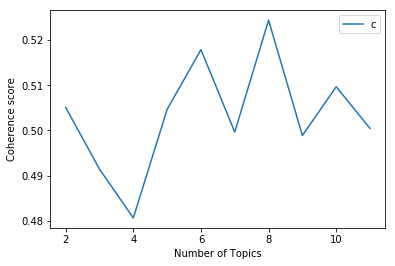

In [18]:
start, stop, step = 2, 12, 1

plot_graph(clean_text, start, stop, step)

### This plot would suggest that the Best Number of Topics to use is 8